<a href="https://colab.research.google.com/github/marcomunozq-miaad-uacj/Programacion1Semestre/blob/Programacion1Sem/Practica_6_Manejo_de_libreria_Pandas_Marco_Antonio_Mu%C3%B1oz_Quiroz_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica #6. Manejo de libreria Pandas
Alumno: Marco Antonio Muñoz Quiroz

https://github.com/marcomunozq-miaad-uacj/Programacion1Semestre/blob/cdfd1e688e30112f269a8e7c04598a300356a250/Practica_6_Manejo_de_libreria_Pandas_Marco_Antonio_Mu%C3%B1oz_Quiroz_ipynb.ipynb


Instrucciones: Carga el archivo titanic.csv en la carpeta correspondiente de Google drive para realizar los siguientes ejercicios

In [72]:
#Conectamos Google Drive a este Notebook para poder leer el mbox.txt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semestre1/Programacion/Semana1/ClassFiles/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Ejercicio 1: Análisis de la distribución de supervivencia por combinación de sexo y clase del pasajero.**

Calcula la proporción de supervivencia para cada combinación de 'Sex' y 'Pclass'.
 Identifica qué combinación tuvo la tasa de supervivencia más alta.
Identifica qué combinación tuvo la tasa de supervivencia más baja.

In [74]:
# Agrupar por 'Sex' y 'Pclass' y calcular la proporción de supervivencia
survival_rates = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
survival_rates['Survived'] = survival_rates['Survived'] * 100
survival_rates['Survived'] = survival_rates['Survived'].map(lambda x: f"{x:.1f}%")

# Identificar la combinación con la mayor tasa de supervivencia
max_survival = survival_rates.loc[survival_rates['Survived'].idxmax()]

# Identificar la combinación con la menor tasa de supervivencia
min_survival = survival_rates.loc[survival_rates['Survived'].idxmin()]

# Mostrar resultados
print("Proporciones de supervivencia por combinación de sexo y clase:")
print(survival_rates,"\n")
print("\nMayor tasa de supervivencia: Primera clase y Mujeres con un 96.8%")
print(max_survival,"\n")
print("\nMenor tasa de supervivencia: Tercera clase y hombres con un 13.5%")
print(min_survival,"\n")


Proporciones de supervivencia por combinación de sexo y clase:
      Sex  Pclass Survived
0  female       1    96.8%
1  female       2    92.1%
2  female       3    50.0%
3    male       1    36.9%
4    male       2    15.7%
5    male       3    13.5% 


Mayor tasa de supervivencia: Primera clase y Mujeres con un 96.8%
Sex         female
Pclass           1
Survived     96.8%
Name: 0, dtype: object 


Menor tasa de supervivencia: Tercera clase y hombres con un 13.5%
Sex          male
Pclass          3
Survived    13.5%
Name: 5, dtype: object 



**Ejercicio 2: Identificación de familias grandes a bordo.**

Crea una nueva columna 'FamilySize' sumando las columnas 'SibSp' y 'Parch'.
Considera como "familia grande" a aquellas donde 'FamilySize' es mayor a 3.
Calcula el número de pasajeros en familias grandes.
Calcula la proporción de supervivencia entre los pasajeros que pertenecen a familias grandes.

In [75]:
# SibSp — El número de hermanos o cónyuges que tenía el pasajero a bordo del Titanic.
# Parch — El número de padres o hijos que tenía el pasajero a bordo del Titanic

# Crear la columna 'FamilySize' sumando 'SibSp' y 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  #Sumamos 1 para que cuente a la persona del renglon

# Filtrar pasajeros con familias grandes (FamilySize > 3)
Familia_grande = df[df['FamilySize'] > 3]

num_pasajeros_familias_grandes = len(Familia_grande)

# Calcular la proporción de supervivencia entre los pasajeros de familias grandes
Sup_fam_grande = Familia_grande['Survived'].mean()

# Mostrar resultados
print(f"Número de pasajeros en familias grandes: {num_pasajeros_familias_grandes}")
print(f"Proporción de supervivencia entre pasajeros que pertenecen a familias grandes: {Sup_fam_grande:.2%}")


Número de pasajeros en familias grandes: 91
Proporción de supervivencia entre pasajeros que pertenecen a familias grandes: 34.07%


**Ejercicio 3: Segmentación por grupos de edad.**

Clasifica a los pasajeros en las siguientes categorías de edad(tip puede resultar mas sencillo realizarlo con una función)

Menor de Edad

Mayor de Edad

In [76]:
# Definimos una funcion para clasificar si es mayor o menor  a 18 años y cuando el renglon no tiene valor
def clasificar_edad(edad):
    if pd.isna(edad):   # en caso de valores nulos en Age
        return "Desconocido"
    elif edad < 18:
        return "Menor de Edad"
    else:
        return "Mayor de Edad"

# Crear nueva columna con la categoría
df['CategoriaEdad'] = df['Age'].apply(clasificar_edad)

# Ver las 3 columnas usadas
df[['Name', 'Age', 'CategoriaEdad']]


,Name,Age,CategoriaEdad
0,"Braund, Mr. Owen Harris",22.0,Mayor de Edad
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mayor de Edad
2,"Heikkinen, Miss. Laina",26.0,Mayor de Edad
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mayor de Edad
4,"Allen, Mr. William Henry",35.0,Mayor de Edad
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,Mayor de Edad
887,"Graham, Miss. Margaret Edith",19.0,Mayor de Edad
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,Desconocido
889,"Behr, Mr. Karl Howell",26.0,Mayor de Edad


**Ejercicio 4: Comparación entre promedios calculados manualmente y con Pandas**

Utiliza NumPy para calcular el promedio de las columnas 'Age' y 'Fare', ignorando valores nulos.
Compara estos valores con los promedios obtenidos utilizando los métodos nativos de Pandas.
Verifica que los resultados sean consistentes.

In [77]:
import numpy as np

# Calcular con NumPy con nanmean el cual quita NAs
mean_age_np = np.nanmean(df['Age'])
mean_fare_np = np.nanmean(df['Fare'])

# Calcular con Pandas nativo
mean_age_pd = df['Age'].mean()
mean_fare_pd = df['Fare'].mean()

# Mostrar resultados
print("Promedio con NumPy:")
print("Age :", mean_age_np)
print("Fare:", mean_fare_np)

print("\nPromedio con Pandas:")
print("Age :", mean_age_pd)
print("Fare:", mean_fare_pd)
print("\nConclusion: Pandas nativamente elimina NAs en los datos")


Promedio con NumPy:
Age : 29.69911764705882
Fare: 32.204207968574636

Promedio con Pandas:
Age : 29.69911764705882
Fare: 32.204207968574636

Conclusion: Pandas nativamente elimina NAs en los datos


Segun la documentacion de pandas, automaticamentem elimina NAs
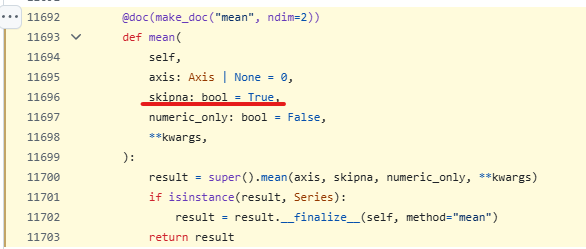

**Ejercicio 5. Creación de intervalos de clase usando NumPy y análisis con Pandas**

Divide la columna 'Fare' en 5 intervalos equidistantes utilizando la función numpy.linspace, el estudiante deberá investigar la operación de esta función en python.
Crea una nueva columna en el DataFrame que asigne a cada pasajero el intervalo correspondiente de su tarifa.
Calcula el número de pasajeros en cada intervalo utilizando Pandas y la proporción de supervivientes por intervalo.

Haciendo una busqueda en google encontramos que esta funcion recibe generalmente 3 parametros, un valor inicial, un valor final y un intervalo, que si no se especifica el valor por default es 50 (y debe ser positivo)

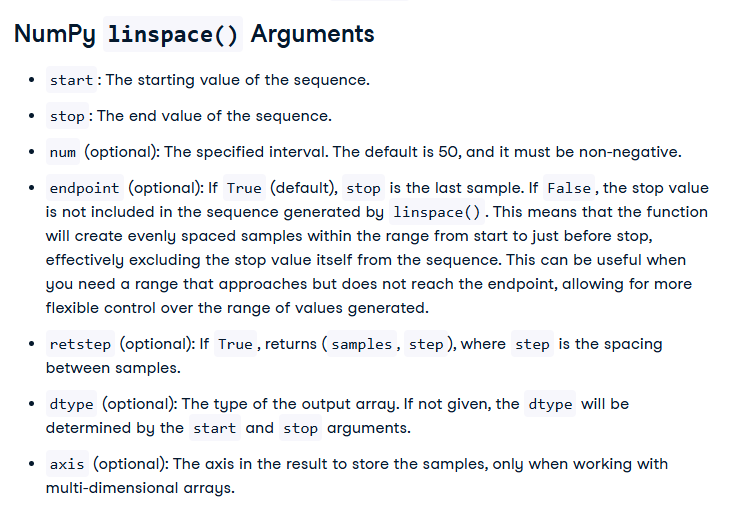


In [78]:
# Ejemplo de uso
np.linspace(0, 100, 5)
# array([  0.,  25.,  50.,  75., 100.])

array([  0.,  25.,  50.,  75., 100.])

En lo anterior vemos que el ultimo numero que recibe la funcion (en este caso el 5) es la cantidad de numeros, pero no la cantidad de intervalos. Por ejemplo, en el caso anterior tenemos 5 partes y 4 intervalos

In [79]:
# Definimos una columna nueva "intervalos_equidistantes" con la ayuda de la funcion np.linspace(min, max, num)
intervalos_equidistantes = np.linspace(df['Fare'].min(), df['Fare'].max(), 6)
nombres_intervalos = ["Muy Bajo", "Bajo", "Medio", "Alto", "Muy Alto"]

print(intervalos_equidistantes, nombres_intervalos)

[  0.      102.46584 204.93168 307.39752 409.86336 512.3292 ] ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']


In [80]:
df['FareCategory'] = pd.cut(df['Fare'], bins=intervalos_equidistantes, labels=nombres_intervalos, include_lowest=True)
df['Intervalos'] = pd.cut(df['Fare'], bins=intervalos_equidistantes, include_lowest=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CategoriaEdad,FareCategory,Intervalos
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Desconocido,Muy Bajo,"(-0.001, 102.466]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mayor de Edad,Muy Bajo,"(-0.001, 102.466]"


Haciendo tambien una investigacion en google vemos que la forma completa de la funcion es

pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates="raise")

donde:


x: The 1D input array to be binned.

bins: Defines the bin edges for segmentation.

right (default: True): If True, bins include the rightmost edge.

labels: Assigns labels to bins. If False, only integer indicators are returned.

retbins (default: False): If True, returns the bin edges.


In [88]:
pasajeros_por_intervalo = df['FareCategory'].value_counts().sort_index()
pasajeros_por_intervalo

,count
FareCategory,
Muy Bajo,838
Bajo,33
Medio,17
Alto,0
Muy Alto,3


In [87]:
# Agrupar por intervalo y calcular conteo y proporción de supervivientes
Tabla_Final = df.groupby(['FareCategory', 'Intervalos']).agg(
    Numero_de_Pasajeros=('PassengerId', 'count'),
    Proporcion_de_supervivientes=('Survived', 'mean')
).reset_index()

# Filtrar solo los intervalos con al menos un pasajero
Tabla_Final = Tabla_Final[Tabla_Final['Numero_de_Pasajeros'] > 0]
Tabla_Final['Proporcion_de_supervivientes'] = (Tabla_Final['Proporcion_de_supervivientes'] * 100).round(2).map(lambda x: f"{x}%")
Tabla_Final

/tmp/ipython-input-2413219044.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Tabla_Final = df.groupby(['FareCategory', 'Intervalos']).agg(


,FareCategory,Intervalos,Numero_de_Pasajeros,Proporcion_de_supervivientes
0,Muy Bajo,"(-0.001, 102.466]",838,36.16%
6,Bajo,"(102.466, 204.932]",33,75.76%
12,Medio,"(204.932, 307.398]",17,64.71%
24,Muy Alto,"(409.863, 512.329]",3,100.0%
